## 9.1 가장 흔한 방식, 일반 CSS
- 처음 생성한 프로젝트는 일반 CSS 방식으로 만들어져있다.
- CSS를 작성할 때 가장 중요한 점은 CSS 클래스를 중복되지 않게 만드는 것
    - 이름을 지을 때 특별한 규칙을 사용하여 짓는 것
    - CSS Selector를 활용
        - .App 안에 있는 .logo에 스타일 적용 > .App .logo{...}
    - 컴포넌트 이름 - 클래스 형태
    - BEM 네이밍 : 해당 클래스가 어디에서 어떤 용도로 사용되는지 명확하게 작성

## 9.2 Sass 사용하기
- Sass(Syntactically Awesome Style Sheets)는 CSS 전처리기로 복잡한 작업을 쉽게 할 수 있도록 해주고, 재활용성을 높이고, 가독성을 높여 유지 보수를 쉽게 해준다.
- .scss와 .sass 확장자를 지원
- sass 라이브러리 설치 yarn add sass
- SassComponent.scss
    ```scss
    // 변수 사용하기
    $red: #fa5252;
    $orange: #fd7e14;
    $yellow: #fcc419 ;
    $green: #40c057 ;
    $blue: #339af0 ;
    $indigo: #5c7cfa ;
    $violet: #7950f2 ;

    // 믹스인 만들기
    @mixin square($size){
        $calculated: 32px*$size;
        width:$calculated;
        height: $calculated;
    }

    .SassComponent {
        display: flex;
        .box {
        background: red; // 일반 CSS 에선 .SassComponent .box 와 마찬가지
        cursor: pointer;
        transition: all 0.3s ease-in;
        &.red {
            // .red 클래스가 .box 와 함께 사용 됐을 때
            background: $red;
            @include square(1);
        }
        &.orange {
            background: $orange;
            @include square(2);
        }
        &.yellow {
            background: $yellow;
            @include square(3);
        }
        &.green {
            background: $green;
            @include square(4);
        }
        &.blue {
            background: $blue;
            @include square(5);
        }
        &.indigo {
            background: $indigo;
            @include square(6);
        }
        &.violet {
            background: $violet;
            @include square(7);
        }
        &:hover {
            // .box 에 마우스 올렸을 때
            background: black;
        }
        }
    }
    ```
- SassComponent.js 작성
```js
import './SassComponent.scss';

const SassComponent = () => {
  return (
    <div className="SassComponent">
      <div className="box red" />
      <div className="box orange" />
      <div className="box yellow" />
      <div className="box green" />
      <div className="box blue" />
      <div className="box indigo" />
      <div className="box violet" />
    </div>
  );
};

export default SassComponent;
```
- 결과
    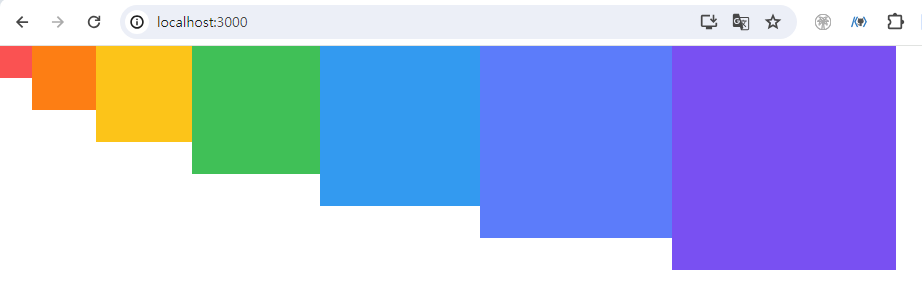

- utils 함수 분리
    - 여러 파일에서 사용 될 수 있는 Sass 변수 및 믹스인은 다른 파일로 분리하여 작성
    - src/styles/utils.scss 참고
    - @import './styles/utils';로 불러와 사용

### sass-loader 설정 커스터마이징
- 필수는 아니지만 해 두면 유용
- 프로젝트 안에서
    - yarn eject
    - config 안에 webpack.config.js
        - 수정 전

        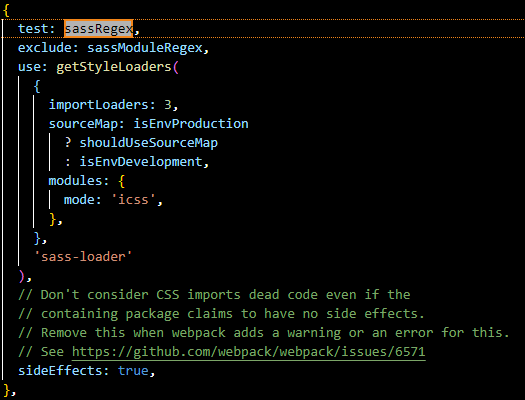

        - 수정 후

        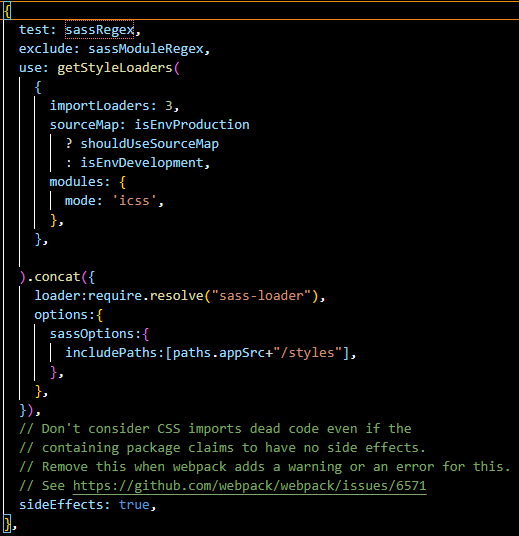

    - import 구문에 상세 주소를 기입안해도 사용가능
        
        - 수정 후

        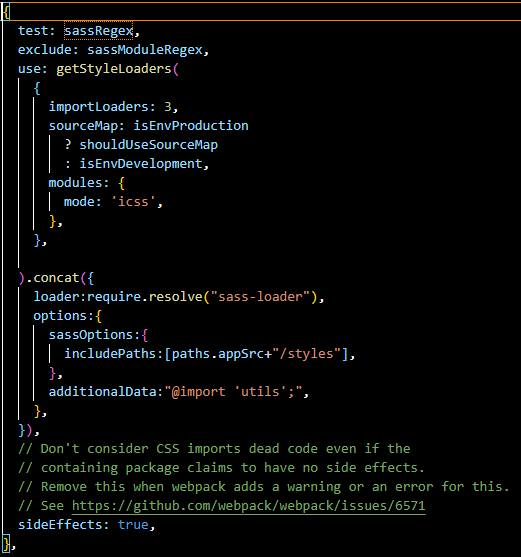

    - 모든 scss 파일에서 utils.scss를 자동으로 불러와 import 사용안해도 됨

## 9.3 CSS Module
- 파일이름_클래스이름_해시값 형태로 자동으로 만들어서 컴포넌트 스타이 클래스 이름이 중첩되는 현상을 방지해 주는 기술
```scss
.wrapper {
    background: black;
    padding: 1rem;
    color: white;
    font-size: 2rem;
}
/* 글로벌 CSS 를 작성하고 싶다면 */
:global {
    // :global {} 로 감싸기
    .something {
        font-weight: 800;
        color: aqua;
    }
    // 다른 클래스를 추가 가능
}
```
---
```js
import styles from './CSSModule.module.scss';

const CSSModule = () => {
    return (
        <div className={styles.wrapper}>
            안녕하세요, 저는 <span className="something">CSS Module!</span>
        </div>
    );
};

export default CSSModule;
```

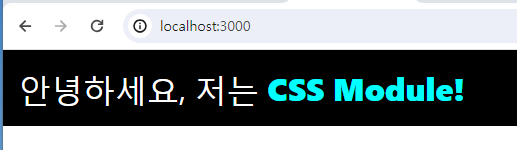

### classnames
- CSS 클래스를 조건부로 설정할 때 유용한 라이브러리
- yarn add classnames 설치
```js
import classNames from 'classnames/bind';
import styles from './CSSModule.module.scss';

const cx = classNames.bind(styles); // 미리 styles 에서 클래스를 받아오도록 설정하고

const CSSModule = () => {
  return (
    <div className={cx('wrapper', 'inverted')}>
      안녕하세요, 저는 <span className="something">CSS Module!</span>
    </div>
  );
};

export default CSSModule;
```
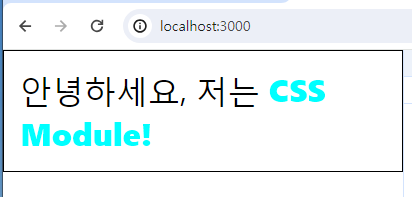

## 9.4 styled-components
- CSS-in-JS
    - 자바스크립트 파일 안에 스타일을 선언하는 방식
    - styled-components 학습
    - yarn add styled-components 설치
    - 자바스크립트 파일 하나에 스타일까지 작성할 수 있기 때문에 .css 또는 .scss 확장자 스타일 파일을 따로 만들지 않아도 된다.
    - 가장 큰 장점은 props 값으로 전달해 주는 값을 쉽게 스타일에 적용할 수 있다는 것
```js
import styled, { css } from 'styled-components';

const sizes = {
    desktop: 1024,
    tablet: 768
};
  
// 위에있는 size 객체에 따라 자동으로 media 쿼리 함수를 만들어줍니다.
// 참고: https://www.styled-components.com/docs/advanced#media-templates
const media = Object.keys(sizes).reduce((acc, label) => {
acc[label] = (...args) => css`
    @media (max-width: ${sizes[label] / 16}em) {
    ${css(...args)};
    }
`;

return acc;
}, {});
  
const Box = styled.div`
    /* props 로 넣어준 값을 직접 전달해줄 수 있습니다. */
    background: ${props => props.color || 'blue'};
    padding: 1rem;
    display: flex;
    width: 1024px;
    margin: 0 auto;
    ${media.desktop`width: 768px;`}
    ${media.tablet`width: 100%;`};
`;

const Button = styled.button`
    background: white;
    color: black;
    border-radius: 4px;
    padding: 0.5rem;
    display: flex;
    align-items: center;
    justify-content: center;
    box-sizing: border-box;
    font-size: 1rem;
    font-weight: 600;

    /* & 문자를 사용하여 Sass 처럼 자기 자신 선택 가능 */
    &:hover {
        background: rgba(255, 255, 255, 0.9);
    }

    /* 다음 코드는 inverted 값이 true 일 때 특정 스타일을 부여해줍니다. */
    ${props =>
        props.inverted &&
        css`
            background: none;
            border: 2px solid white;
            color: white;
            &:hover {
                background: white;
                color: black;
            }
        `};
    & + button {
        margin-left: 1rem;
    }
`;

const StyledComponent = () => (
  <Box color="black">
    <Button>안녕하세요</Button>
    <Button inverted={true}>테두리만</Button>
  </Box>
);

export default StyledComponent;
```
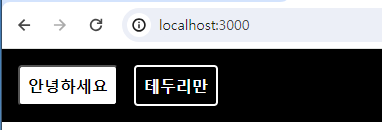